In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.ellipse import Ellipse, ellipse_raster
from pyinverse.grid import RegularGrid, FFTRegularAxis

In [3]:
p = Phantom()
e = p._ellipses[4]

In [4]:
e

Ellipse(rho=0.1, a=0.21, b=0.25, x0=0.0, y0=0.35, phi_deg=0.0)

In [5]:
N1 = N2 = 16
grid = RegularGrid(FFTRegularAxis(N1, d=1/2), FFTRegularAxis(N2, d=1/2))

In [7]:
A = ellipse_raster(e, grid)

<IPython.core.display.Javascript object>


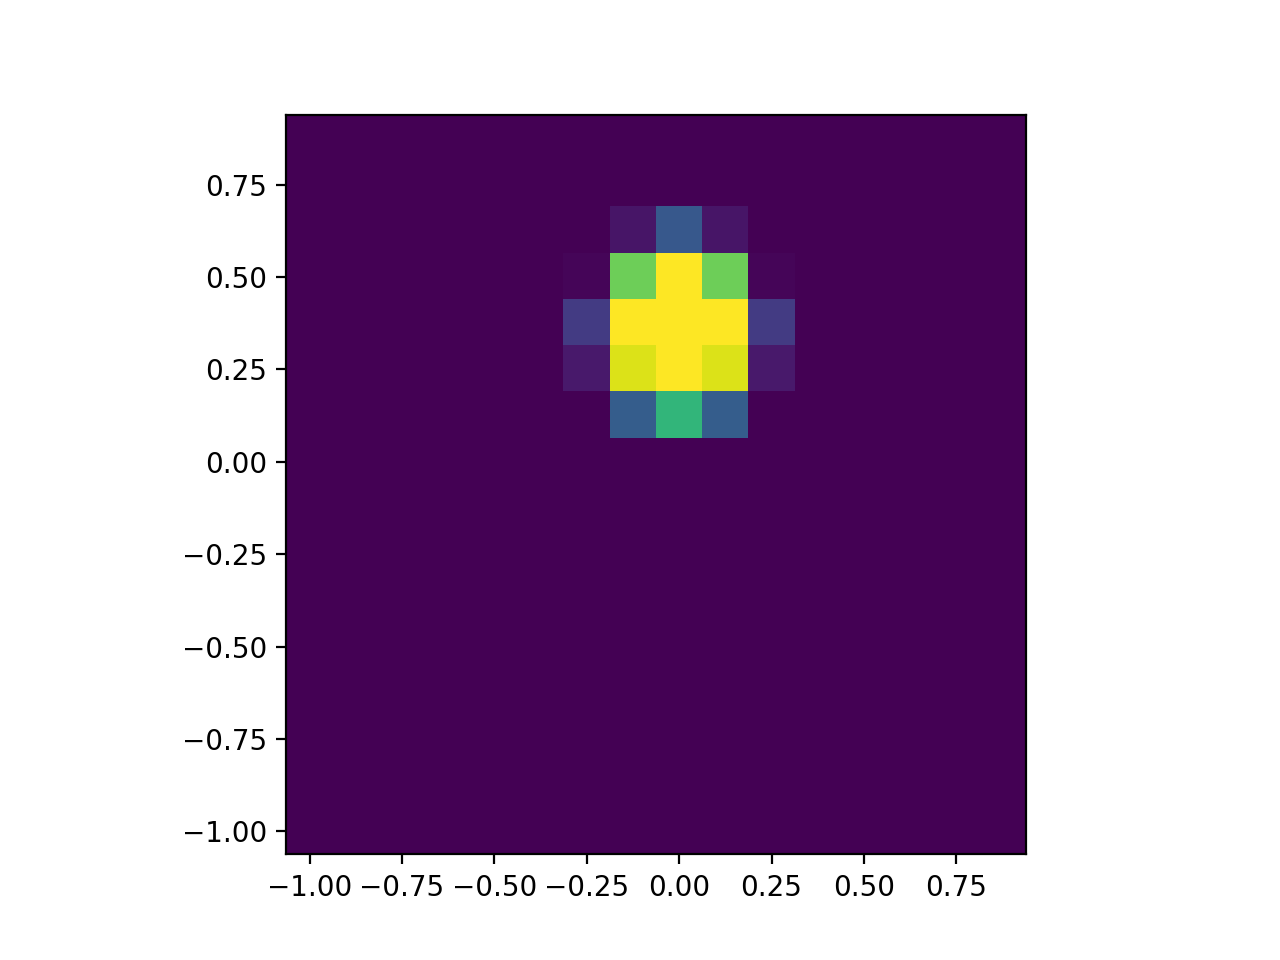

In [9]:
fig, ax = plt.subplots()
grid.imshow(ax, A)

In [10]:
grid.axis_y.borders[::-1]

array([ 0.9375,  0.8125,  0.6875,  0.5625,  0.4375,  0.3125,  0.1875,
        0.0625, -0.0625, -0.1875, -0.3125, -0.4375, -0.5625, -0.6875,
       -0.8125, -0.9375, -1.0625])

In [11]:
ellipse = e
regular_grid = grid

In [12]:
min_x, min_y, max_x, max_y = ellipse.bounds

In [13]:
J1 = max(np.argwhere(regular_grid.axis_x.borders[:-1] >= min_x)[0][0] - 1, 0)
J2 = min(np.argwhere(regular_grid.axis_x.borders[1:] <= max_x)[-1][0] + 1, regular_grid.axis_x.N - 1)
I1 = min(np.argwhere(regular_grid.axis_y.borders[::-1][1:] >= max_y)[-1][0] + 1, regular_grid.axis_y.N - 1)
I2 = max(np.argwhere(regular_grid.axis_y.borders[::-1][:-1] <= min_y)[0][0] - 1, 0)

In [14]:
(J1, J2), (I1, I2)

((6, 10), (2, 6))

In [15]:
X, Y = np.meshgrid(regular_grid.axis_x.borders[J1:J2+2] - ellipse.x0,
                   regular_grid.axis_y.borders[::-1][I1:I2+2] - ellipse.y0)
D = (X*ellipse.cos_phi + Y*ellipse.sin_phi)**2 / ellipse.a_sq + (Y*ellipse.cos_phi - X*ellipse.sin_phi)**2 / ellipse.b_sq

In [16]:
I = np.zeros_like(A)
for i, I_i in enumerate(range(I1, I2 + 1)):
    for j, I_j in enumerate(range(J1, J2 + 1)):
        D_corners = np.array([D[i, j], D[i, j+1], D[i+1, j], D[i+1, j+1]])
        I[I_i, I_j] = sum(D_corners <= 1)

In [17]:
I

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 3., 4., 3., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 4., 4., 4., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 3., 4., 3., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

<IPython.core.display.Javascript object>


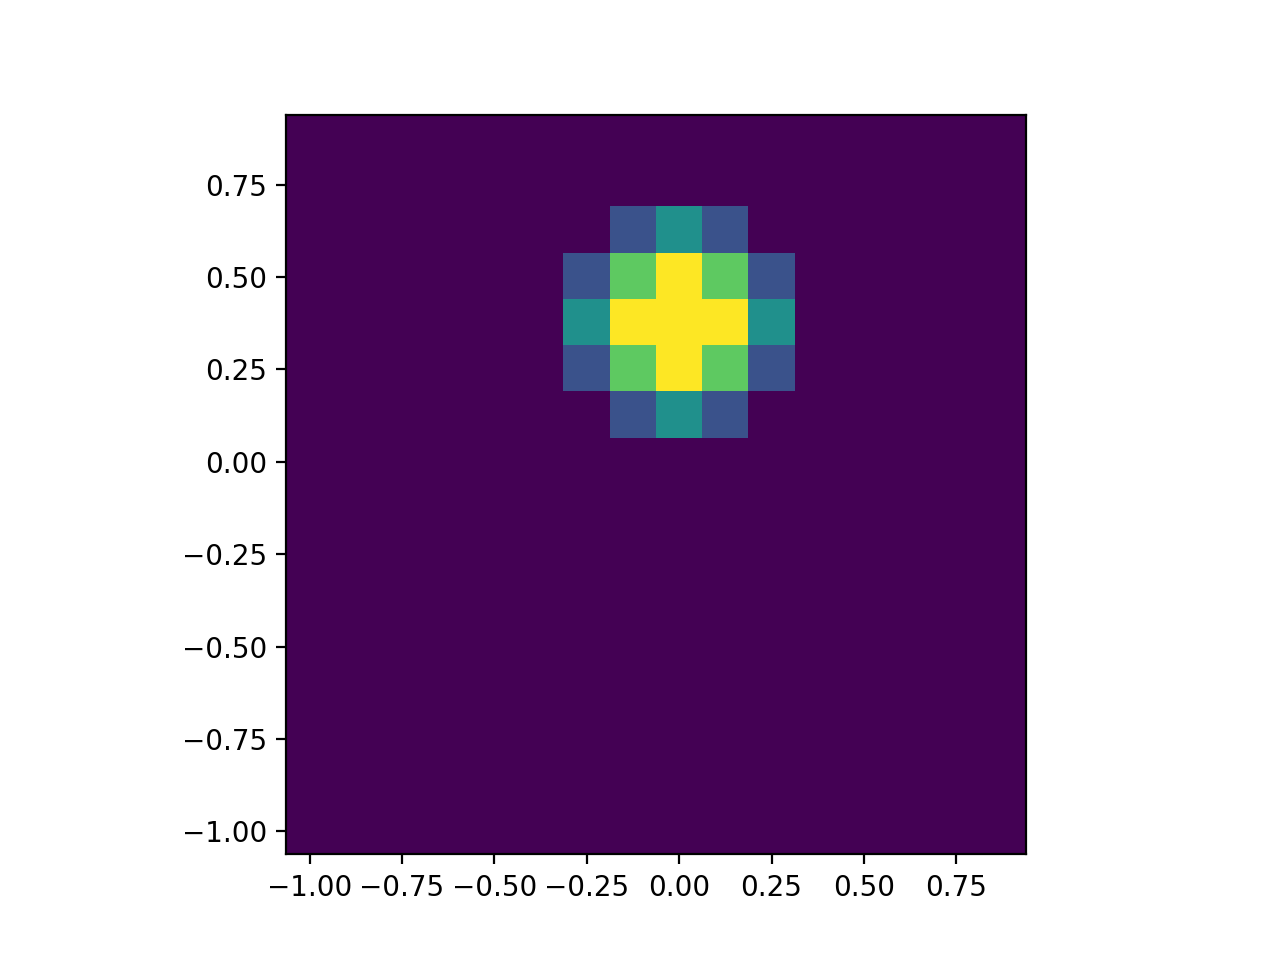

In [18]:
fig, ax = plt.subplots()
grid.imshow(ax, I)